In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import os
print(os.getcwd())

/content


In [5]:
file_path = r"/content/data_1.csv"
data = pd.read_csv(file_path)

In [6]:
data.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1.0,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2.0,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3.0,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4.0,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5.0,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162605 entries, 0 to 1162604
Data columns (total 39 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   OBJECTID                       1162605 non-null  int64  
 1   Shape                          1162605 non-null  object 
 2   FOD_ID                         1162604 non-null  float64
 3   FPA_ID                         1162604 non-null  object 
 4   SOURCE_SYSTEM_TYPE             1162604 non-null  object 
 5   SOURCE_SYSTEM                  1162604 non-null  object 
 6   NWCG_REPORTING_AGENCY          1162604 non-null  object 
 7   NWCG_REPORTING_UNIT_ID         1162604 non-null  object 
 8   NWCG_REPORTING_UNIT_NAME       1162604 non-null  object 
 9   SOURCE_REPORTING_UNIT          1162604 non-null  object 
 10  SOURCE_REPORTING_UNIT_NAME     1162604 non-null  object 
 11  LOCAL_FIRE_REPORT_ID           325114 non-null   object 
 12  LOCAL_INCIDENT

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

OBJECTID                               0
Shape                                  0
FOD_ID                                 1
FPA_ID                                 1
SOURCE_SYSTEM_TYPE                     1
SOURCE_SYSTEM                          1
NWCG_REPORTING_AGENCY                  1
NWCG_REPORTING_UNIT_ID                 1
NWCG_REPORTING_UNIT_NAME               1
SOURCE_REPORTING_UNIT                  1
SOURCE_REPORTING_UNIT_NAME             1
LOCAL_FIRE_REPORT_ID              837491
LOCAL_INCIDENT_ID                 591762
FIRE_CODE                         935115
FIRE_NAME                         594320
ICS_209_PLUS_INCIDENT_JOIN_ID    1148116
ICS_209_PLUS_COMPLEX_JOIN_ID     1159788
MTBS_ID                          1154906
MTBS_FIRE_NAME                   1154906
COMPLEX_NAME                     1159261
FIRE_YEAR                              1
DISCOVERY_DATE                         1
DISCOVERY_DOY                          1
DISCOVERY_TIME                    563221
NWCG_CAUSE_CLASS

In [9]:
# Select only columns of interest
col_of_interest = ['OBJECTID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_GENERAL_CAUSE', 'CONT_DATE', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE' , 'LONGITUDE' , 'STATE']
data = data[col_of_interest].set_index('OBJECTID', verify_integrity = True)

# Let's rename the columns and the index for more clarity
data = data.rename(columns = {'FIRE_YEAR':'fire_year',
                         'DISCOVERY_DATE':'disc_date',
                         'DISCOVERY_DOY':'disc_doy',
                         'DISCOVERY_TIME' : 'disc_time',
                         'NWCG_GENERAL_CAUSE':'cause',
                         'CONT_DATE':'cont_date',
                         'CONT_TIME':'cont_time',
                         'FIRE_SIZE' : 'fire_size',
                         'FIRE_SIZE_CLASS' : 'fire_class',
                         'LATITUDE':'latitude',
                         'LONGITUDE':'longitude',
                         'STATE':'state'}).rename_axis('id')

# Let's convert the columns 'disc_date' and 'cont_date' in datetime format and add a colmun with the month
data['disc_date'] = pd.to_datetime(pd.to_datetime(data['disc_date'], format = '%m/%d/%Y').dt.strftime('%Y-%m-%d'))
data['cont_date'] = pd.to_datetime(pd.to_datetime(data['cont_date'], format = '%m/%d/%Y').dt.strftime('%Y-%m-%d'))
data.insert(3, 'disc_month', data['disc_date'].dt.month)
data.insert(4, 'disc_day', data['disc_date'].dt.day_name())

data.head()

,fire_year,disc_date,disc_doy,disc_month,disc_day,disc_time,cause,cont_date,cont_time,fire_size,fire_class,latitude,longitude,state
id,,,,,,,,,,,,,,
1,2005.0,2005-02-02,33.0,2.0,Wednesday,1300.0,Power generation/transmission/distribution,2005-02-02,1730.0,0.10,A,40.036944,-121.005833,CA
2,2004.0,2004-05-12,133.0,5.0,Wednesday,845.0,Natural,2004-05-12,1530.0,0.25,A,38.933056,-120.404444,CA
3,2004.0,2004-05-31,152.0,5.0,Monday,1921.0,Debris and open burning,2004-05-31,2024.0,0.10,A,38.984167,-120.735556,CA
4,2004.0,2004-06-28,180.0,6.0,Monday,1600.0,Natural,2004-07-03,1400.0,0.10,A,38.559167,-119.913333,CA
5,2004.0,2004-06-28,180.0,6.0,Monday,1600.0,Natural,2004-07-03,1200.0,0.10,A,38.559167,-119.933056,CA


In [10]:
import numpy as np

In [11]:
# Create our own classes, based on the paper from Short (2014)
data['fire_class_check'] = pd.cut(x=data['fire_size'],
                                bins=[0, 0.25, 9.9999, 99.9999, 299.9999, 999.9999, 4999.9999, np.inf],
                                include_lowest=True,
                                labels=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Check if letters in the original dataset match with our classes
for letter in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
  print("Wrong match for category", letter, "=", data.loc[(data['fire_class_check'] != data['fire_class']) & (data['fire_class'] == letter)].shape[0])

Wrong match for category A = 0
Wrong match for category B = 0
Wrong match for category C = 0
Wrong match for category D = 0
Wrong match for category E = 0
Wrong match for category F = 0
Wrong match for category G = 0


In [12]:
#removing the fire_class_check column
data.drop('fire_class_check', axis = 1, inplace = True)

In [13]:
data.head()

,fire_year,disc_date,disc_doy,disc_month,disc_day,disc_time,cause,cont_date,cont_time,fire_size,fire_class,latitude,longitude,state
id,,,,,,,,,,,,,,
1,2005.0,2005-02-02,33.0,2.0,Wednesday,1300.0,Power generation/transmission/distribution,2005-02-02,1730.0,0.10,A,40.036944,-121.005833,CA
2,2004.0,2004-05-12,133.0,5.0,Wednesday,845.0,Natural,2004-05-12,1530.0,0.25,A,38.933056,-120.404444,CA
3,2004.0,2004-05-31,152.0,5.0,Monday,1921.0,Debris and open burning,2004-05-31,2024.0,0.10,A,38.984167,-120.735556,CA
4,2004.0,2004-06-28,180.0,6.0,Monday,1600.0,Natural,2004-07-03,1400.0,0.10,A,38.559167,-119.913333,CA
5,2004.0,2004-06-28,180.0,6.0,Monday,1600.0,Natural,2004-07-03,1200.0,0.10,A,38.559167,-119.933056,CA


In [14]:
# Defining function to give some basics informations on the dataset, such as missing values, mode, mean, format of the variables.

def summary(data):
    '''This function allows to provide an overview of a dataset including missing values, mode or mean, format of the variables, number of unique values and alerts.'''
    table = pd.DataFrame(index = data.columns,
                        columns = ['Dtype', '%NA', 'nbr_unique', 'Unique', 'Mean/Mode', 'Alert'])
    table.loc[:,'Dtype'] = data.dtypes.values
    table.loc[:,'%NA'] = np.round((data.isna().sum().values / len(data)*100) ,1)
    table.loc[:,'nbr_unique'] = data.nunique().values

    def get_unique(colonne):
        if colonne.dtypes == 'datetime64[ns]':
            return 'Datetime format'
        elif colonne.nunique() < 5:
            return colonne.unique()
        else:
            return 'Too many values' if colonne.dtypes == 'int64' or colonne.dtypes == 'float64' \
        else 'Too many categories'

    def mean_or_mode(colonne):
        if colonne.dtypes == 'datetime64[ns]':
            return 'Datetime format'
        elif colonne.dtypes == 'number':
            return colonne.mean()
        else:
            return colonne.mode()[0]

    def alerts(colonne, threshold_na = 0.2, threshold_mode = 0.8):
        if colonne.isna().sum()/len(data) > threshold_na:
            return '! Too many NA'
        elif colonne.value_counts(normalize = True).values[0] > threshold_mode:
            return '! Unbalanced'
        else:
            return 'Nothing to report'

    table.loc[:, 'Unique'] = data.apply(get_unique)
    table.loc[:, 'Mean/Mode'] = data.apply(mean_or_mode)
    table.loc[:, 'Alert'] = data.apply(alerts)

    return table

summary(data)

,Dtype,%NA,nbr_unique,Unique,Mean/Mode,Alert
fire_year,float64,0.0,19,Too many values,2006.0,Nothing to report
disc_date,datetime64[ns],0.0,6872,Datetime format,Datetime format,Nothing to report
disc_doy,float64,0.0,366,Too many values,185.0,Nothing to report
disc_month,float64,0.0,12,Too many values,7.0,Nothing to report
disc_day,object,0.0,7,Too many categories,Saturday,Nothing to report
disc_time,float64,48.4,1440,Too many values,1400.0,! Too many NA
cause,object,0.0,13,Too many categories,Debris and open burning,Nothing to report
cont_date,datetime64[ns],49.1,6779,Datetime format,Datetime format,! Too many NA
cont_time,float64,53.0,1440,Too many values,1800.0,! Too many NA
fire_size,float64,0.0,9644,Too many values,0.1,Nothing to report


**The column cont_date contains a lot of missing values.
Columns disc_time and cont_time seem ok (0%NA) but do not present Mean or Mode in appearance  This suggesting that blanks are not considered a  missing value**.

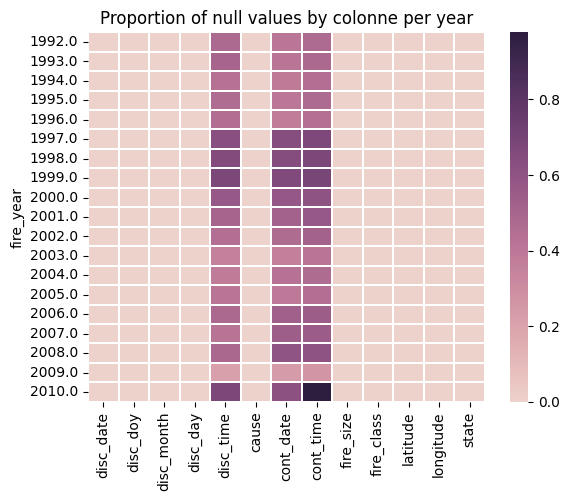

In [15]:
# Force blanks to be NA
data.disc_time.replace('',None, inplace = True)
data.cont_time.replace('',None, inplace = True)

# Print Heatmap of Missing values
na_proportions = data.groupby('fire_year').apply(lambda group: 1 - group.drop('fire_year', axis=1).notnull().mean())
ax = sns.heatmap(na_proportions, linewidth=.1, cmap=sns.cubehelix_palette(as_cmap=True));
plt.title('Proportion of null values by colonne per year');

**Date/time information for at the moment when wildfires have been contained is missing all along the study period.
We can note that disc_time and cont_time are not numeic data**a

In [16]:
# Function to check if a value is a valid four-digit time string between "0000" and "2359"
def is_valid_time(value):
    # Check if the value is a string with length 4 and in the correct range
    if isinstance(value, str) and len(value) == 4 and '0000' <= value <= '2359':
        return True
    return False

# Apply the function to each column and check if all values are valid
for time in ['disc_time', 'cont_time']:
    is_correct = data[time].apply(is_valid_time).all()
    print(f"All values in {time} are correct:", is_correct)


All values in disc_time are correct: False
All values in cont_time are correct: False


In [17]:
# Filter rows where 'cont_time' values are not four characters long, only if the value is a string
invalid_length_rows = data[~data['cont_time'].apply(lambda x: isinstance(x, str) and len(x) == 4)]

# Display the filtered rows
print(invalid_length_rows[['cont_time']])

         cont_time
id                
1           1730.0
2           1530.0
3           2024.0
4           1400.0
5           1200.0
...            ...
1162601     1505.0
1162602     1410.0
1162603     1509.0
1162604     1431.0
1162605        NaN

[1162605 rows x 1 columns]


In [18]:
# Select rows where 'cont_time' values are not strings of length 4
invalid_length_rows = data.loc[~data['cont_time'].apply(lambda x: isinstance(x, str) and len(x) == 4)]

# Display the filtered rows with all columns
invalid_length_rows

,fire_year,disc_date,disc_doy,disc_month,disc_day,disc_time,cause,cont_date,cont_time,fire_size,fire_class,latitude,longitude,state
id,,,,,,,,,,,,,,
1,2005.0,2005-02-02,33.0,2.0,Wednesday,1300.0,Power generation/transmission/distribution,2005-02-02,1730.0,0.10,A,40.036944,-121.005833,CA
2,2004.0,2004-05-12,133.0,5.0,Wednesday,845.0,Natural,2004-05-12,1530.0,0.25,A,38.933056,-120.404444,CA
3,2004.0,2004-05-31,152.0,5.0,Monday,1921.0,Debris and open burning,2004-05-31,2024.0,0.10,A,38.984167,-120.735556,CA
4,2004.0,2004-06-28,180.0,6.0,Monday,1600.0,Natural,2004-07-03,1400.0,0.10,A,38.559167,-119.913333,CA
5,2004.0,2004-06-28,180.0,6.0,Monday,1600.0,Natural,2004-07-03,1200.0,0.10,A,38.559167,-119.933056,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162601,2004.0,2004-01-12,12.0,1.0,Monday,1409.0,Debris and open burning,2004-01-12,1505.0,3.50,B,32.154986,-88.357041,AL
1162602,2004.0,2004-01-12,12.0,1.0,Monday,1345.0,Missing data/not specified/undetermined,2004-01-12,1410.0,0.10,A,31.531787,-86.965675,AL
1162603,2004.0,2004-01-12,12.0,1.0,Monday,1410.0,Debris and open burning,2004-01-12,1509.0,4.00,B,31.312296,-87.031693,AL


In [19]:
# Drop NaN values for the check
data_check = data.dropna()

# Function to check if a value is a valid four-digit time string between "0000" and "2359"
def is_valid_time(value):
    # Check if the value is a string, has length 4, and is within the range "0000" to "2359"
    return isinstance(value, str) and len(value) == 4 and '0000' <= value <= '2359'

# Verify that all values in 'disc_time' and 'cont_time' columns are correct
for time in ['disc_time', 'cont_time']:
    correct_values_count = data_check[time].apply(is_valid_time).sum()
    print(f"All values in {time} are correct:", correct_values_count == data_check.shape[0])

# Display missing values in original data
display(data.isna().sum())

# Clean up the temporary DataFrame
del data_check


All values in disc_time are correct: False
All values in cont_time are correct: False


,0
fire_year,1
disc_date,1
disc_doy,1
disc_month,1
disc_day,1
disc_time,563221
cause,1
cont_date,571280
cont_time,616602
fire_size,1


In [20]:
# List of unique values for causes
data.cause.unique()

array(['Power generation/transmission/distribution', 'Natural',
       'Debris and open burning',
       'Missing data/not specified/undetermined',
       'Recreation and ceremony', 'Equipment and vehicle use',
       'Arson/incendiarism', 'Fireworks', 'Other causes',
       'Railroad operations and maintenance', 'Smoking',
       'Misuse of fire by a minor', 'Firearms and explosives use', nan],
      dtype=object)

**The causes of wildfires causes are very specific, let's define more global categories so we can have different level of analysis.**

In [21]:
# Dict for mapping
map_cause = {'Power generation/transmission/distribution':'Accidental',
            'Natural':'Natural',
            'Debris and open burning':'Accidental',
            'Missing data/not specified/undetermined':'Undefined',
            'Recreation and ceremony':'Accidental',
            'Equipment and vehicle use':'Accidental',
            'Arson/incendiarism':'Criminal',
            'Fireworks':'Accidental',
            'Other causes':'Accidental',
            'Railroad operations and maintenance':'Accidental',
            'Smoking':'Accidental',
            'Misuse of fire by a minor':'Accidental',
            'Firearms and explosives use':'Accidental'}

data['origin'] = data['cause'].map(map_cause)

data.head()

,fire_year,disc_date,disc_doy,disc_month,disc_day,disc_time,cause,cont_date,cont_time,fire_size,fire_class,latitude,longitude,state,origin
id,,,,,,,,,,,,,,,
1,2005.0,2005-02-02,33.0,2.0,Wednesday,1300.0,Power generation/transmission/distribution,2005-02-02,1730.0,0.10,A,40.036944,-121.005833,CA,Accidental
2,2004.0,2004-05-12,133.0,5.0,Wednesday,845.0,Natural,2004-05-12,1530.0,0.25,A,38.933056,-120.404444,CA,Natural
3,2004.0,2004-05-31,152.0,5.0,Monday,1921.0,Debris and open burning,2004-05-31,2024.0,0.10,A,38.984167,-120.735556,CA,Accidental
4,2004.0,2004-06-28,180.0,6.0,Monday,1600.0,Natural,2004-07-03,1400.0,0.10,A,38.559167,-119.913333,CA,Natural
5,2004.0,2004-06-28,180.0,6.0,Monday,1600.0,Natural,2004-07-03,1200.0,0.10,A,38.559167,-119.933056,CA,Natural


**We could determine the precisely the duration of wildfires using disc_time and cont_time data, however these calculations increase largely the size of the dataframe. For the rest of the analysis, we will therefore calculate a approximative duration using disc_date and cont_date.**

In [22]:
#  To calculate wildfire duration in minutes.
# col = ['disc_date','disc_time', 'cont_date', 'cont_time']

# df_duration = df[col].dropna()

# def get_full_date_time(df, col_date, col_time):
#     date_time = pd.to_datetime(df[col_date].astype(str) + ' ' + df[col_time].str[:2] + ':' + \
#                               df[col_time].str[2:], format = '%Y-%m-%d %H:%M')
#     return date_time


# df_duration['full_date_start'] = get_full_date_time(df_duration, 'disc_date', 'disc_time')
# df_duration['full_date_end'] = get_full_date_time(df_duration, 'cont_date', 'cont_time')

# df_duration['duration'] = pd.to_timedelta(df_duration['full_date_end'] - \
#                                   df_duration['full_date_start'])#.dt.total_seconds().div(60).astype(int)

# df = pd.merge(df, df_duration, how = 'left').drop(['disc_time', 'cont_time', 'full_date_start', 'full_date_end'], axis = 1)

In [23]:
# Delete disc_time and cont_time columns
data.drop(['disc_time', 'cont_time'], axis = 1, inplace = True)

In [24]:
data.head()

,fire_year,disc_date,disc_doy,disc_month,disc_day,cause,cont_date,fire_size,fire_class,latitude,longitude,state,origin
id,,,,,,,,,,,,,
1,2005.0,2005-02-02,33.0,2.0,Wednesday,Power generation/transmission/distribution,2005-02-02,0.10,A,40.036944,-121.005833,CA,Accidental
2,2004.0,2004-05-12,133.0,5.0,Wednesday,Natural,2004-05-12,0.25,A,38.933056,-120.404444,CA,Natural
3,2004.0,2004-05-31,152.0,5.0,Monday,Debris and open burning,2004-05-31,0.10,A,38.984167,-120.735556,CA,Accidental
4,2004.0,2004-06-28,180.0,6.0,Monday,Natural,2004-07-03,0.10,A,38.559167,-119.913333,CA,Natural
5,2004.0,2004-06-28,180.0,6.0,Monday,Natural,2004-07-03,0.10,A,38.559167,-119.933056,CA,Natural


**Making different interactive maps to have a global overview of wildfires in US.**

In [26]:
file_path = r"/content/data_1.csv"
df = pd.read_csv(file_path)

In [27]:
df.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


In [28]:
# Select only columns of interest
col_of_interest = ['OBJECTID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'NWCG_GENERAL_CAUSE', 'CONT_DATE', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE' , 'LONGITUDE' , 'STATE']
df = df[col_of_interest].set_index('OBJECTID', verify_integrity = True)

In [29]:
# Rename the columns and the index
df = df.rename(columns = {'FIRE_YEAR':'fire_year',
                         'DISCOVERY_DATE':'disc_date',
                         'DISCOVERY_DOY':'disc_doy',
                         'NWCG_GENERAL_CAUSE':'cause',
                         'CONT_DATE':'cont_date',
                         'FIRE_SIZE' : 'fire_size',
                         'FIRE_SIZE_CLASS' : 'fire_class',
                         'LATITUDE':'latitude',
                         'LONGITUDE':'longitude',
                         'STATE':'state'}).rename_axis('id')

In [30]:
# Convert the columns 'disc_date' and 'cont_date' in datetime format and add a colmun with the month
df['disc_date'] = pd.to_datetime(pd.to_datetime(df['disc_date'], format = '%m/%d/%Y').dt.strftime('%Y-%m-%d'))
df['cont_date'] = pd.to_datetime(pd.to_datetime(df['cont_date'], format = '%m/%d/%Y').dt.strftime('%Y-%m-%d'))
df.insert(3, 'disc_month', df['disc_date'].dt.month)
df.insert(4, 'disc_day', df['disc_date'].dt.day_name())

# Define a new column 'origin'
map_cause = {'Power generation/transmission/distribution':'Accidental',
            'Natural':'Natural',
            'Debris and open burning':'Accidental',
            'Missing data/not specified/undetermined':'Undefined',
            'Recreation and ceremony':'Accidental',
            'Equipment and vehicle use':'Accidental',
            'Arson/incendiarism':'Criminal',
            'Fireworks':'Accidental',
            'Other causes':'Accidental',
            'Railroad operations and maintenance':'Accidental',
            'Smoking':'Accidental',
            'Misuse of fire by a minor':'Accidental',
            'Firearms and explosives use':'Accidental'}

df['origin'] = df['cause'].map(map_cause)

df.head()

,fire_year,disc_date,disc_doy,disc_month,disc_day,cause,cont_date,CONT_TIME,fire_size,fire_class,latitude,longitude,state,origin
id,,,,,,,,,,,,,,
1,2005,2005-02-02,33,2,Wednesday,Power generation/transmission/distribution,2005-02-02,1730.0,0.10,A,40.036944,-121.005833,CA,Accidental
2,2004,2004-05-12,133,5,Wednesday,Natural,2004-05-12,1530.0,0.25,A,38.933056,-120.404444,CA,Natural
3,2004,2004-05-31,152,5,Monday,Debris and open burning,2004-05-31,2024.0,0.10,A,38.984167,-120.735556,CA,Accidental
4,2004,2004-06-28,180,6,Monday,Natural,2004-07-03,1400.0,0.10,A,38.559167,-119.913333,CA,Natural
5,2004,2004-06-28,180,6,Monday,Natural,2004-07-03,1200.0,0.10,A,38.559167,-119.933056,CA,Natural


**Plotting a map at the US scale, showing different origin for wildfires bigger than 1000 acres.**

In [31]:
import plotly.express as px
import plotly.subplots as psp
import plotly.graph_objects as go

In [32]:
us_map = px.scatter_geo(df[(df['fire_class'] == 'G') | (df['fire_class'] == 'F')].sort_values('fire_year'),
                                 lon = 'longitude',
                                 lat = 'latitude',
                                 size = 'fire_size',
                                 color = 'origin',
                                 hover_data = 'fire_class',
                                 animation_frame = 'fire_year',
                                 labels = {'origin' : '',
                                          'fire_year' : 'Year'},
                                 title = 'Origin of large wildfires in US from 1992 to 2020')

us_map.update_layout(width=1200,
                              height=600,
                              geo_scope='usa',
                              template = "plotly_dark",
                              legend = dict(orientation="h",
                                            yanchor="top",
                                            y=1.1,
                                            xanchor="left",
                                            x=0.1)
                             )

us_map.show()

In [33]:
# Detailed interactive map for California
interactive_map_CA = px.scatter_geo(df[(df['state'] == 'CA') & ((df['fire_class'] == 'G') | (df['fire_class'] == 'F'))].sort_values('fire_year'),
                                 lon = 'longitude',
                                 lat = 'latitude',
                                 size = 'fire_size',
                                 color = 'cause',
                                 hover_data = 'fire_class',
                                 animation_frame = 'fire_year',
                                 labels = {'cause' : '',
                                          'fire_year' : 'Year'},
                                    title = 'Causes of large wildfires in California over time'
                                 )

interactive_map_CA.update_layout(width=800,
                              height=800,
                              template = "plotly_dark",
                              geo_scope = 'usa',
                              legend = dict(orientation="h",
                                            yanchor="top",
                                            y=1.1,
                                            xanchor="left",
                                            x=0.1),
                                 geo=dict(center=dict(lat=37.4, # 36.778261
                                                      lon=-119.4179324),
                                          projection_scale=2.5
                                         )
                                )

interactive_map_CA.show()

In [34]:
fires_by_states = df.groupby('state')['state'].value_counts()
# fires_by_states = df.groupby('state')['fire_size'].sum()

fires_by_states.head()
fig = px.choropleth(locations=fires_by_states.index,
                    locationmode="USA-states",
                    color=fires_by_states.values,
                    scope="usa",
                    color_continuous_scale="solar",
                    template = "plotly_dark",
                    labels = {'locations' : 'State',
                              'color' : 'Nbr Wildfires'},
                    title = 'Number of wildfires by state since 1992 ')

fig.update_layout(width=800,
                  height=400,
                  coloraxis_colorbar=dict(title="Total"),
                  legend = dict(orientation="h",
                                yanchor="top",
                                y=1.1,
                                xanchor="left",
                                x=0.1)
                             )


fig.show()

**States in the Souths are more prone to wildfires.**

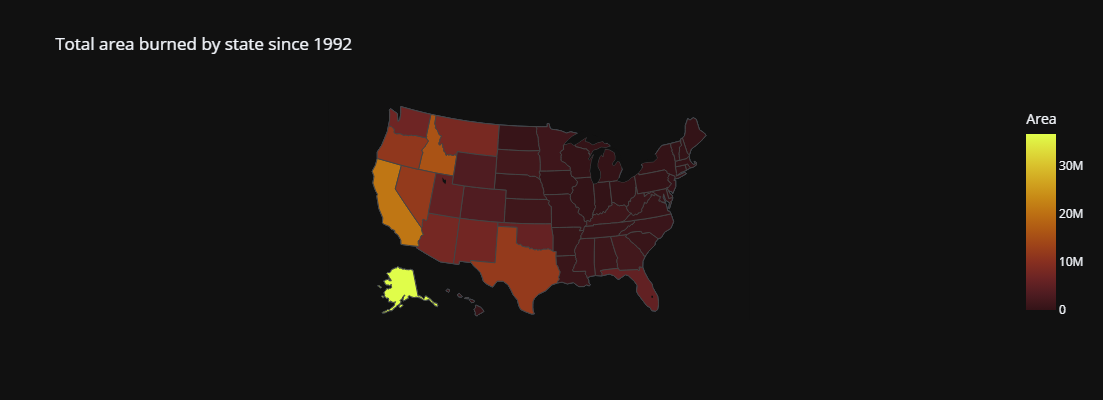

In [ ]:
fires_by_states = df.groupby('state')['fire_size'].sum()

fires_by_states.head()
fig = px.choropleth(locations=fires_by_states.index,
                    locationmode="USA-states",
                    color=fires_by_states.values,
                    scope="usa",
                    color_continuous_scale="solar",
                    template = "plotly_dark",
                    labels = {'locations' : 'State',
                              'color' : 'Burned area'},
                    title = 'Total area burned by state since 1992')

fig.update_layout(width=800,
                  height=400,
                  coloraxis_colorbar=dict(title="Area"),
                  legend = dict(orientation="h",
                                yanchor="top",
                                y=1.1,
                                xanchor="left",
                                x=0.1)
                             )


fig.show()

**Data Exploration**

In [ ]:
import scipy as sp
import numpy as np

In [ ]:
# Limit the analysis to contiguous US
# df = df.loc[(df['latitude']>=25) & (df['latitude']<=50)]
df['geo_area'] = np.char.add(np.where(df['latitude'] >= 38.0, 'N', 'S'), np.where(df['longitude'] >= -100, 'E', 'W'))

In [ ]:
df.head()

,fire_year,disc_date,disc_doy,disc_month,disc_day,cause,cont_date,CONT_TIME,fire_size,fire_class,latitude,longitude,state,origin,geo_area
id,,,,,,,,,,,,,,,
1,2005,2005-02-02,33,2,Wednesday,Power generation/transmission/distribution,2005-02-02,1730.0,0.10,A,40.036944,-121.005833,CA,Accidental,NW
2,2004,2004-05-12,133,5,Wednesday,Natural,2004-05-12,1530.0,0.25,A,38.933056,-120.404444,CA,Natural,NW
3,2004,2004-05-31,152,5,Monday,Debris and open burning,2004-05-31,2024.0,0.10,A,38.984167,-120.735556,CA,Accidental,NW
4,2004,2004-06-28,180,6,Monday,Natural,2004-07-03,1400.0,0.10,A,38.559167,-119.913333,CA,Natural,NW
5,2004,2004-06-28,180,6,Monday,Natural,2004-07-03,1200.0,0.10,A,38.559167,-119.933056,CA,Natural,NW


**1. Long term trends: Have wildfires become more or less frequent over time?**

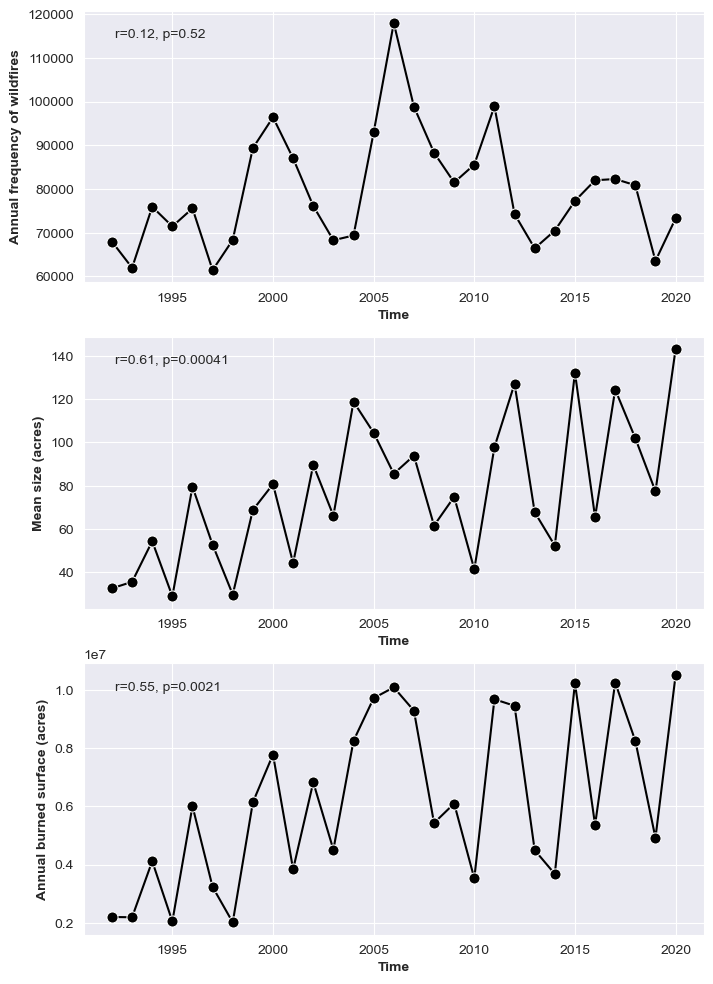

In [ ]:
# Summurize several properties of wildfires by year
df_trends = pd.DataFrame(
    index = np.arange(1992, 2021, 1),
    columns = ['Nbr_fire', 'Average_size_fire' , 'Total_fire_size']
)

df_trends['Nbr_fire'] =  df['fire_year'].value_counts(sort = False)
df_trends['Average_size_fire'] = df.groupby('fire_year').agg({'fire_size':'mean'})
df_trends["Total_fire_size"] = df.groupby('fire_year').agg({'fire_size':'sum'})

# Figures properties
colonnes = ['Nbr_fire', 'Average_size_fire', 'Total_fire_size']
y_names = ['Annual frequency of wildfires', 'Mean size (acres)', 'Annual burned surface (acres)']
axes = [311, 312, 313]
liste_color = ['black', 'black', 'black']

fig = plt.figure(figsize = (8,12))

sns.set_style("darkgrid")

# Make figures and statistical tests to quantify long-term trends of wildfires
for col, name, j, coul in zip(colonnes, y_names, axes, liste_color):
    ax = plt.subplot(j)
    sns.lineplot(x = df_trends.index.values, y = col, data = df_trends, markers = True, marker = 'o', color = coul, markersize = 8)
    r, p = sp.stats.pearsonr(df_trends.index.values, df_trends[col])
    ax = plt.gca()
    ax.text(.05, .9, 'r={:.2f}, p={:.2g}'.format(r, p), transform=ax.transAxes, size = 10)
    plt.ylabel(name, fontweight ='bold', size = 10)
    plt.xlabel('Time', fontweight = 'bold', size = 10)

plt.show()

**Overall, there is no significant increase in the annual fequency of wildfire over the study period. However, we do observe a significant increase in their mean size, and, subsequently, in the annual area of burned surface.**

**Now let's see more in details these trends by doing the same figures as above but for each origin of wildfires.**

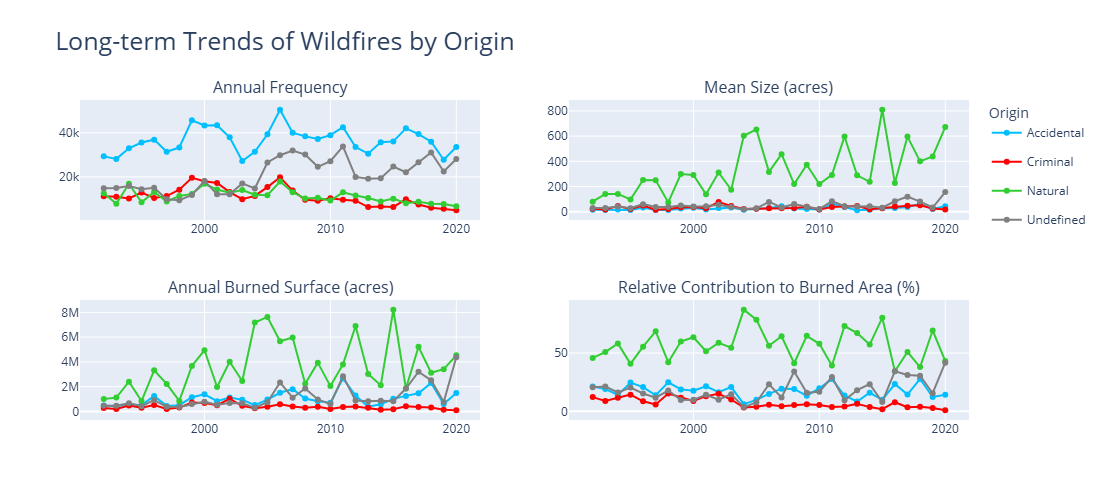

In [ ]:
# Summarize properties by year and by origin
frequency_by_origine = df.groupby('fire_year')['origin'].value_counts().unstack()
frequency_by_origine.columns = frequency_by_origine.columns.str.capitalize()

mean_size_by_origine = round(df.groupby(['fire_year', 'origin']).agg({'fire_size': 'mean'}), 1).unstack()
mean_size_by_origine.columns = ['Accidental', 'Criminal', 'Natural', 'Undefined']

burned_surf_by_origine = round(df.groupby(['fire_year', 'origin']).agg({'fire_size': 'sum'}), 0).unstack()
burned_surf_by_origine.columns = ['Accidental', 'Criminal', 'Natural', 'Undefined']

liste1 = ['Accidental', 'Criminal', 'Natural', 'Undefined']
liste2 = ['%Accidental', '%Criminal', '%Natural', '%Undefined']

for origine, col in zip(liste1, liste2):
    burned_surf_by_origine[col] = round(burned_surf_by_origine[origine] / burned_surf_by_origine.sum(axis=1) * 100, 1)

# Make the figures with updated color labels
figure1 = px.line(frequency_by_origine, x=frequency_by_origine.index,
                  y=['Accidental', 'Criminal', 'Natural', 'Undefined'],
                  markers=True,
                  labels={'fire_year': 'Time',
                          'value': 'Nbr of wildfire per year',
                          'variable': 'Origin'},
                  color_discrete_sequence=["deepskyblue", "red", "limegreen", "grey"])

figure2 = px.line(mean_size_by_origine, x=mean_size_by_origine.index,
                  y=['Accidental', 'Criminal', 'Natural', 'Undefined'],
                  markers=True,
                  labels={'fire_year': 'Time', 'variable': 'Origin'},
                  color_discrete_sequence=["deepskyblue", "red", "limegreen", "grey"])

figure3 = px.line(burned_surf_by_origine, x=mean_size_by_origine.index,
                  y=['Accidental', 'Criminal', 'Natural', 'Undefined'],
                  markers=True,
                  labels={'fire_year': 'Time', 'variable': 'Origin'},
                  color_discrete_sequence=["deepskyblue", "red", "limegreen", "grey"])

figure4 = px.line(burned_surf_by_origine, x=mean_size_by_origine.index,
                  y=['%Accidental', '%Criminal', '%Natural', '%Undefined'],
                  markers=True,
                  labels={'fire_year': 'Time', 'variable': 'Origin'},
                  color_discrete_sequence=["deepskyblue", "red", "limegreen", "grey"])

# Gather the figures in one subplot
this_figure = psp.make_subplots(rows=2, cols=2, subplot_titles=['Annual Frequency', 'Mean Size (acres)',
                                                                'Annual Burned Surface (acres)', 'Relative Contribution to Burned Area (%)'])
this_figure.update_layout(height=500, width=1100, title_text="Long-term Trends of Wildfires by Origin", title_font_size=25)

# Add traces with legends only for the first plot
for trace in figure1.data:
    trace.showlegend = True
    this_figure.add_trace(trace, row=1, col=1)

for trace in figure2.data:
    trace.showlegend = False  # Hide legends for these traces
    this_figure.add_trace(trace, row=1, col=2)

for trace in figure3.data:
    trace.showlegend = False  # Hide legends for these traces
    this_figure.add_trace(trace, row=2, col=1)

for trace in figure4.data:
    trace.showlegend = False  # Hide legends for these traces
    this_figure.add_trace(trace, row=2, col=2)

# Update axis labels
ylabels = ['Annual Frequency', 'Mean Size (acres)', 'Annual Burned Surface (acres)', 'Relative Contribution to Burned Area (%)']
positions = [(1,1), (1,2), (2,1), (2,2)]

for label, col in zip(ylabels, positions):
    this_figure.update_yaxes(title_text=label, row=row, col=col)
    this_figure.update_xaxes(title_text='Time', row=row, col=col)

# Set legend title and adjust layout
this_figure.update_layout(legend_title_text="Origin", showlegend=True)
this_figure.show()

**1) Annual Frequency of Widfires: This shows the number if wildfires per year fr each origin type. This helps to understand which types of fires [accidental (blue), criminal (red), natural (green), unidentified (gray)] are most common over time.**

**2) Average Fire Size: Displays the mean sizes (in acers) of wildfires per origin type each year. This allows us to see if certain origins tend to result in larger fires on average.**

**3) Total Burned Area and Relative Contribution: Combines two metrics in one subplot:**
    a)Total Burned Area: Shows the sum of all burned areas each year, broken down by origin, to illustrate the total land impact of each origin.
    b) Relative Contribution (%): Shows the percentage contribution of each origin to the total burned area for each year. This helps identify which origin types have the greatest impact proportionally.

In [ ]:
# Defining function to analyse the statistical relationships between time and wildfires properties depending on their origin
def get_stats(df):
    pearsonr = []
    p_value = []

    for col in df.columns:
        r, p = sp.stats.pearsonr(df.index, df[col])
        pearsonr.append(r)
        p_value.append(p)

    table = pd.DataFrame(columns = df.columns,
                        index = ['Pearson_r','p_value'])
    table.iloc[0,:] = pearsonr
    table.iloc[1,:] = p_value

    print(table)

# Apply these tests
print('Statistics for long term trends in the annual frequency of wildfire by origin')
get_stats(frequency_by_origine)
print("\n")
print('Statistics for long term trends in the mean size of wildfire by origin')
get_stats(mean_size_by_origine)
print("\n")
print('Statistics for long term trends in the annual burned surface by wildfire by origin')
get_stats(burned_surf_by_origine)

Statistics for long term trends in the annual frequency of wildfire by origin
origin    Accidental  Criminal   Natural Undefined
Pearson_r   0.091866 -0.600087 -0.468855  0.678438
p_value     0.635532  0.000579  0.010301  0.000052


Statistics for long term trends in the mean size of wildfire by origin
          Accidental  Criminal   Natural Undefined
Pearson_r   0.470649  0.090146  0.612498  0.503418
p_value     0.009975  0.641898  0.000413  0.005371


Statistics for long term trends in the annual burned surface by wildfire by origin
          Accidental  Criminal   Natural Undefined %Accidental %Criminal  \
Pearson_r   0.422725 -0.332527  0.374232  0.617308   -0.193348 -0.748677   
p_value     0.022336  0.077987    0.0455  0.000361     0.31493  0.000003   

           %Natural %Undefined  
Pearson_r  0.017795   0.423086  
p_value       0.927    0.02221  


In [ ]:
# Analysing relationship between origin and fire_size, using the class of wildfire
ct = pd.crosstab(df['fire_class'], df['origin'])
display(ct)

from scipy.stats import chi2_contingency
resultats_chi2 = chi2_contingency(ct)

statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]
print("p value = ", p_valeur, "\n")

origin,Accidental,Criminal,Natural,Undefined
fire_class,,,,
A,363277,76371,177740,259021
B,565722,170758,100901,267006
C,109066,62799,29099,56132
D,11534,7167,7077,8230
E,4935,2682,5241,4333
F,2183,851,4307,2351
G,783,186,2954,860


p value =  0.0 



Accidental is the most frequent origin for wildfire and shows no significant long term pattern. Accidental and Natural origins seem to decrease since the mid 2000, however these patterns are mirrored by an increase in the Undefined origin, so caution is required here.

The mean size and burned surface of fire show significant increases for all origin except for those of criminal origin. These increases are particularly strong for natural wildfires that are responsible for most of the megafires (classes F and G).

**2. What are the seasonal dynamics of wildfires? Are the patterns similar across the whole US?**

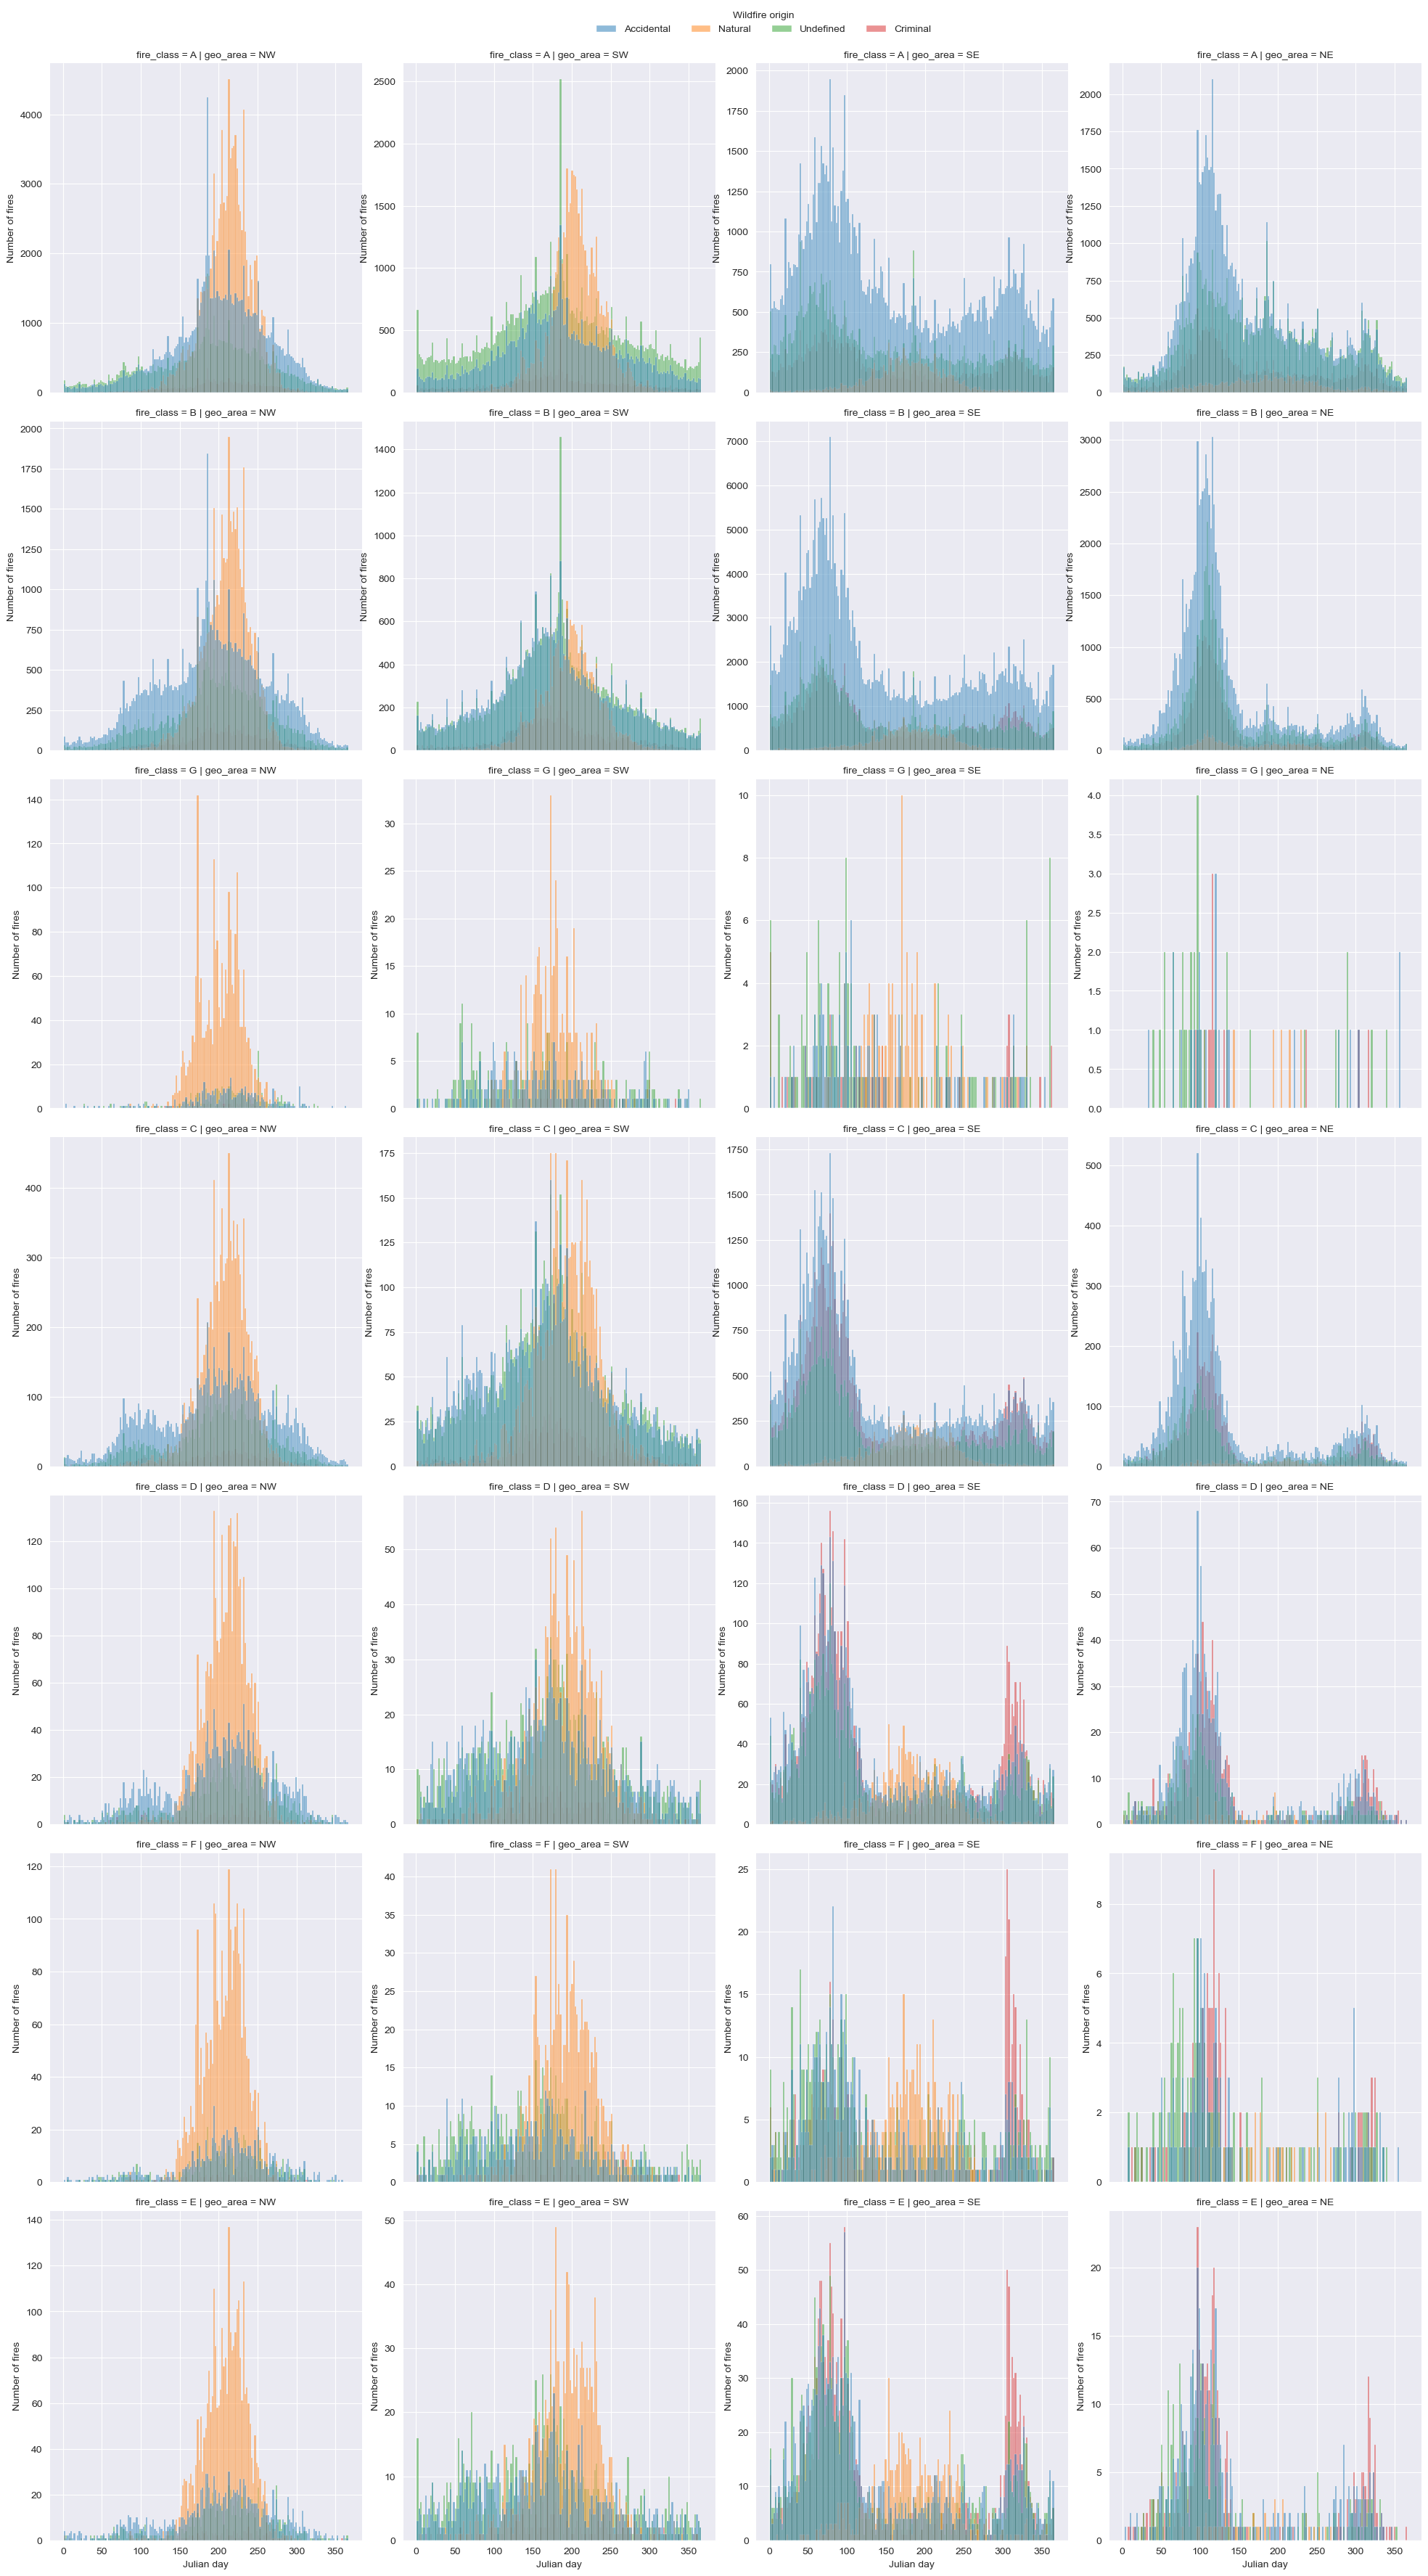

In [ ]:
ax = sns.displot(df,
                 x = df.disc_doy,
                 hue = 'origin',
                 col = 'geo_area',
                 row = 'fire_class',
                 facet_kws=dict(sharey=False));

ax.set(xlabel='Julian day',
       ylabel='Number of fires')

sns.move_legend(ax, "upper center",
               bbox_to_anchor=(0.5, 1.015), ncol=4, title='Wildfire origin', frameon=False)

Seasonality varies greatly across regions of the US along a West-East gradient, with unimodal (peak in June - August) and bimodal (main peak in March-May and second peak in September-October) distributions in the West and East, respectively.

Origin of wildifres alos varies greatly between the West (main cause = natural) and the East (main cause = accidental/criminal.
)
Overall, seasonality for the different size class is similar, depending on the region.

**3. What is the daily variability of wildfires?**

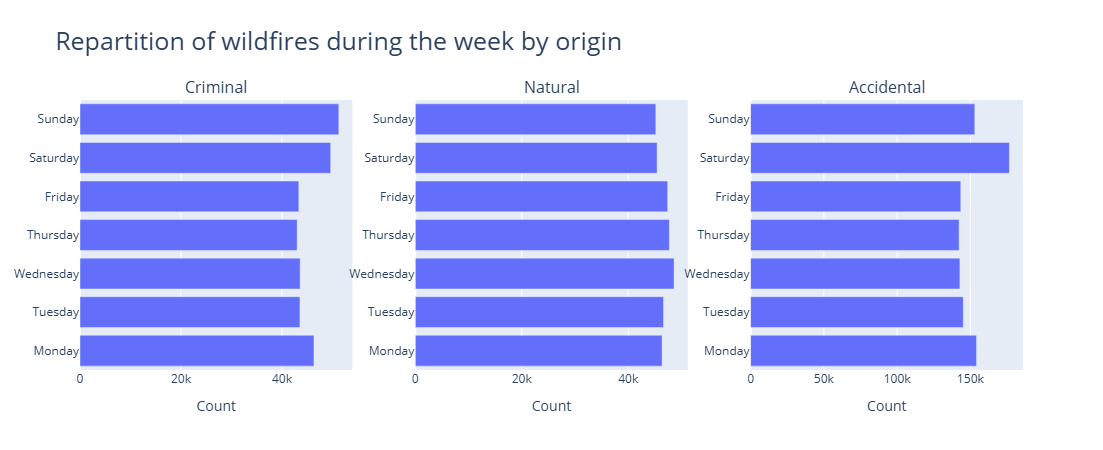

In [ ]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_criminal = df[df['origin'] == 'Criminal']
df_natural = df[df['origin'] == 'Natural']
df_accident = df[df['origin'] == 'Accidental']

week_crimes = df_criminal.groupby([df_criminal['disc_day']])['disc_day'].value_counts().reindex(cats)
week_natural = df_natural.groupby([df_natural['disc_day']])['disc_day'].value_counts().reindex(cats)
week_accident = df_accident.groupby([df_accident['disc_day']])['disc_day'].value_counts().reindex(cats)

figure1 = px.bar(week_crimes, x='count',
             width = 600,
             height = 400,
             labels = {'disc_day':'',
                       'count' : 'Count'},
             title = 'Repartition of criminal wildfires during the week')

figure2 = px.bar(week_natural, x='count',
             width = 600,
             height = 400,
             labels = {'disc_day':'',
                       'count' : 'Count'},
             title = 'Repartition of natural wildfires during the week')

figure3 = px.bar(week_accident, x='count',
             width = 600,
             height = 400,
             labels = {'disc_day':'',
                       'count' : 'Count'},
             title = 'Repartition of accidental wildfires during the week')

# Gather the figures in one subplot
figure1_traces = []
figure2_traces = []
figure3_traces = []

for trace in range(len(figure1["data"])):
    figure1_traces.append(figure1["data"][trace])
for trace in range(len(figure2["data"])):
    figure2["data"][trace]['showlegend'] = False
    figure2_traces.append(figure2["data"][trace])
for trace in range(len(figure3["data"])):
    figure3["data"][trace]['showlegend'] = False
    figure3_traces.append(figure3["data"][trace])


# Create a 1x3 subplot
this_figure = psp.make_subplots(rows = 1, cols = 3, subplot_titles = ['Criminal','Natural', 'Accidental'])
this_figure.update_layout(height = 450, width = 1150, title_text = "Repartition of wildfires during the week by origin", title_font_size = 25)

# Get the Express fig broken down as traces and add the traces to the proper plot within the subplot
for traces in figure1_traces:
    this_figure.append_trace(traces, row = 1, col = 1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row = 1, col = 2)
for traces in figure3_traces:
    this_figure.append_trace(traces, row = 1, col = 3)

# Update the different elements
this_figure.update_xaxes(title_text = 'Count')

this_figure.show()

**Criminal Wildfires:** The occurrence of criminal-origin wildfires is fairly consistent across all days, with slightly higher frequencies on weekends (Saturday and Sunday). This trend might suggest a tendency for criminal activity leading to wildfires over the weekend, potentially due to increased outdoor activities.

**Natural Wildfires:** Natural-origin wildfires are evenly distributed across the week, with no significant peaks on specific days. This uniformity aligns with the fact that natural wildfires are likely influenced by consistent environmental factors like weather, rather than human activity, making them less variable by day.

**Accidental Wildfires:** Accidental-origin wildfires display a noticeable increase on weekends, particularly on Saturday. This pattern might reflect increased outdoor or recreational activities during weekends, where human presence and actions in nature could unintentionally cause fires (e.g campfires, barbecues).

**4. What states are the most and least fire-prone? What are the dominant causes and how they vary spatially?**

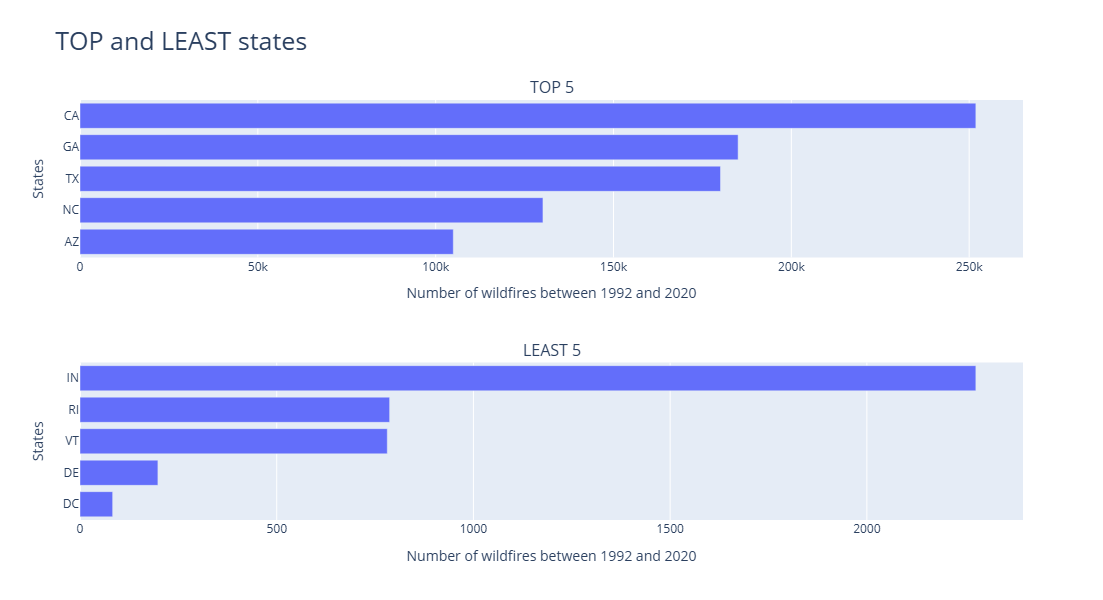

In [ ]:
top5_states = df.state.value_counts()[:5].sort_values()
least5_states = df.state.value_counts()[-5:].sort_values()


fig_top5 =px.bar(top5_states,
             x = top5_states.values)

fig_least5 =px.bar(least5_states,
             x = least5_states.values)

figure1_traces = []
figure2_traces = []

for trace in range(len(fig_top5["data"])):
    figure1_traces.append(fig_top5["data"][trace])
for trace in range(len(fig_least5["data"])):
    fig_least5["data"][trace]['showlegend'] = False
    figure2_traces.append(fig_least5["data"][trace])

this_figure = psp.make_subplots(rows = 2, cols = 1, subplot_titles = ['TOP 5', 'LEAST 5'])
this_figure.update_layout(height = 600, width = 800, title_text = "TOP and LEAST states", title_font_size = 25)

for traces in figure1_traces:
    this_figure.append_trace(traces, row = 1, col = 1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row = 2, col = 1)

rows = [1, 2]

for row in rows:
    this_figure.update_yaxes(title_text = 'States', row = row, col = 1)
    this_figure.update_xaxes(title_text = 'Number of wildfires between 1992 and 2020', row = row, col = 1)

this_figure.show()

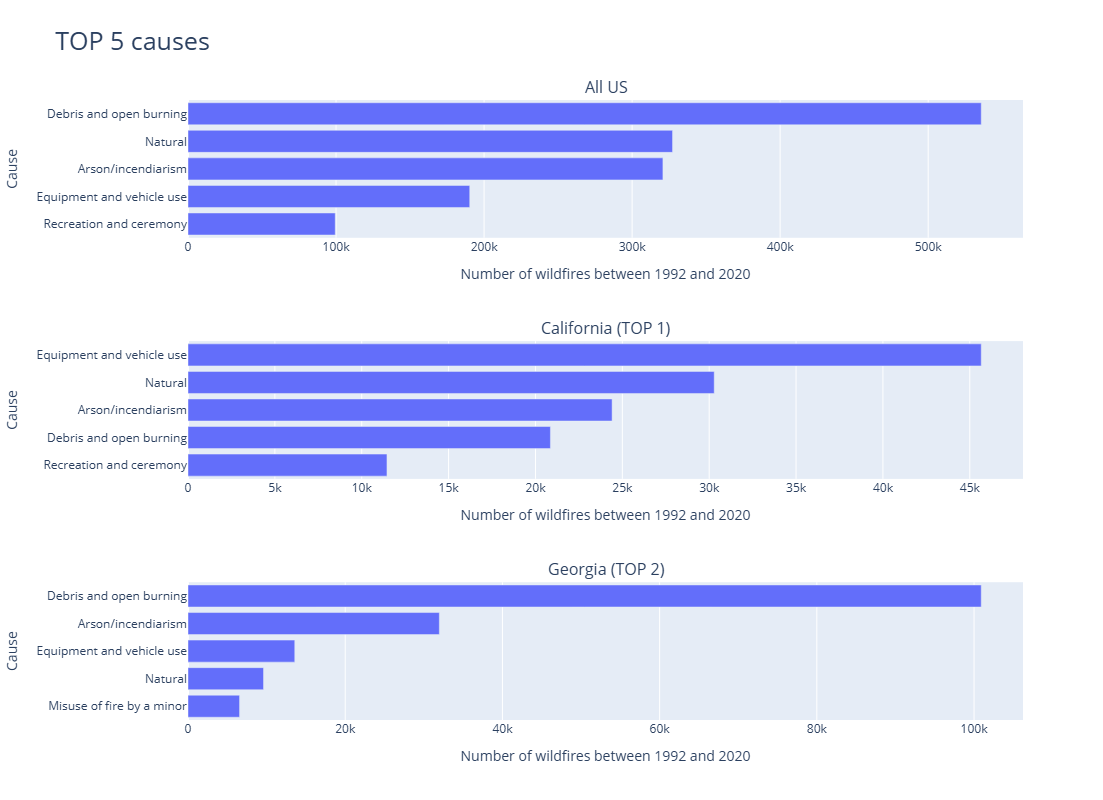

In [ ]:
top5_causes = df[df['cause'] != 'Missing data/not specified/undetermined'].cause.value_counts()[:5].sort_values()
top5_causes_CA = df[(df['cause'] != 'Missing data/not specified/undetermined') & (df['state'] == 'CA')].cause.value_counts()[:5].sort_values()
top5_causes_GA = df[(df['cause'] != 'Missing data/not specified/undetermined') & (df['state'] == 'GA')].cause.value_counts()[:5].sort_values()

fig_all_us =px.bar(top5_causes,
             x = top5_causes.values)

fig_CA =px.bar(top5_causes_CA,
             x = top5_causes_CA.values)


fig_GA =px.bar(top5_causes_GA,
             x = top5_causes_GA.values)

figure1_traces = []
figure2_traces = []
figure3_traces = []

for trace in range(len(fig_all_us["data"])):
    figure1_traces.append(fig_all_us["data"][trace])
for trace in range(len(fig_CA["data"])):
    fig_CA["data"][trace]['showlegend'] = False
    figure2_traces.append(fig_CA["data"][trace])
for trace in range(len(fig_GA["data"])):
    fig_GA["data"][trace]['showlegend'] = False
    figure3_traces.append(fig_GA["data"][trace])

this_figure = psp.make_subplots(rows = 3, cols = 1, subplot_titles = ['All US', 'California (TOP 1)', 'Georgia (TOP 2)'])
this_figure.update_layout(height = 800, width = 800, title_text = "TOP 5 causes", title_font_size = 25)

for traces in figure1_traces:
    this_figure.append_trace(traces, row = 1, col = 1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row = 2, col = 1)
for traces in figure3_traces:
    this_figure.append_trace(traces, row = 3, col = 1)

rows = [1, 2, 3]

for row in rows:
    this_figure.update_yaxes(title_text = 'Cause', row = row, col = 1)
    this_figure.update_xaxes(title_text = 'Number of wildfires between 1992 and 2020', row = row, col = 1)

this_figure.show()

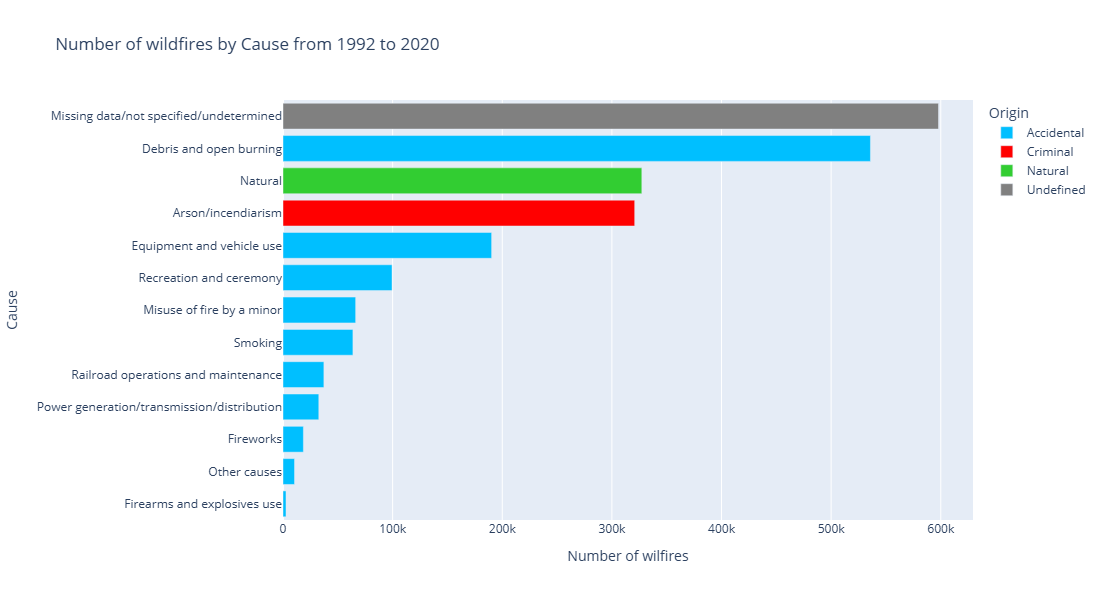

In [ ]:
nbr_wilfires_by_causes = df.groupby(['cause', 'origin'])['disc_doy'].count().reset_index('origin').sort_values(by = 'disc_doy')

fig_nbr_wilfires_by_causes =px.bar(nbr_wilfires_by_causes,
                                   x = nbr_wilfires_by_causes.disc_doy,
                                   color = nbr_wilfires_by_causes.origin,
                       color_discrete_sequence = ["deepskyblue", "red", "limegreen", "grey"],
                       width = 1100,
                       height = 600,
                       title = 'Number of wildfires by Cause from 1992 to 2020',
                       labels = {'disc_doy' : 'Number of wilfires',
                                'cause' : 'Cause',
                                'origin' : 'Origin'},
                       category_orders={'cause': nbr_wilfires_by_causes.index[::-1]}
                      )


fig_nbr_wilfires_by_causes.show()

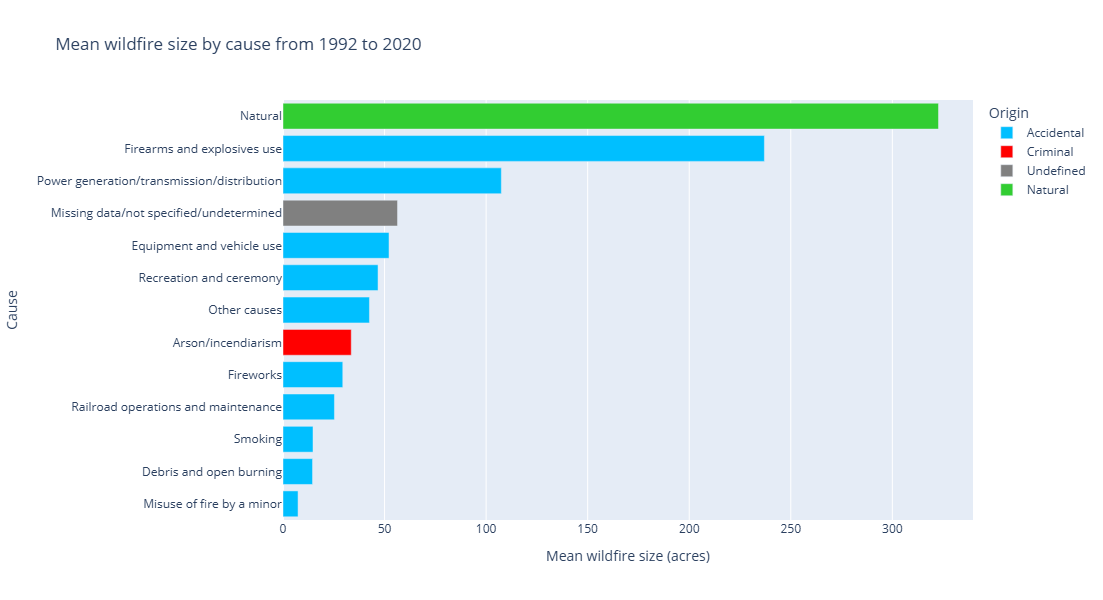

In [ ]:
mean_size_by_causes = df.groupby(['cause', 'origin'])['fire_size'].mean().reset_index('origin').sort_values(by = 'fire_size')

fig_mean_size_cause =px.bar(mean_size_by_causes,
                       x = mean_size_by_causes.fire_size,
                       color = mean_size_by_causes.origin,
                       color_discrete_sequence = ["deepskyblue", "red", "grey", "limegreen"],
                       width = 1100,
                       height = 600,
                       title = 'Mean wildfire size by cause from 1992 to 2020',
                       labels = {'fire_size' : 'Mean wildfire size (acres)',
                                'cause' : 'Cause',
                                'origin' : 'Origin'},
                       category_orders={'cause': mean_size_by_causes.index[::-1]}
                      )

fig_mean_size_cause.show()

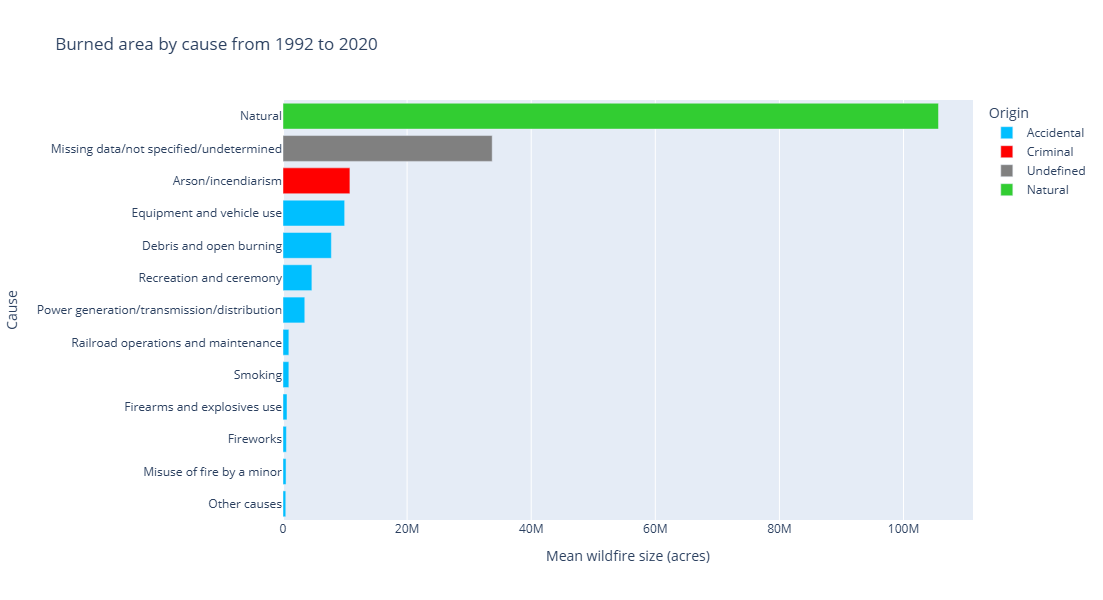

In [ ]:
burned_area_by_causes = df.groupby(['cause', 'origin'])['fire_size'].sum().reset_index('origin').sort_values(by = 'fire_size')

fig_burned_area_by_causes =px.bar(burned_area_by_causes,
                       x = burned_area_by_causes.fire_size,
                       color = burned_area_by_causes.origin,
                       color_discrete_sequence = ["deepskyblue", "red", "grey", "limegreen"],
                       width = 1100,
                       height = 600,
                       title = 'Burned area by cause from 1992 to 2020',
                       labels = {'fire_size' : 'Mean wildfire size (acres)',
                                'cause' : 'Cause',
                                'origin' : 'Origin'},
                       category_orders={'cause': burned_area_by_causes.index[::-1]}
                      )

fig_burned_area_by_causes.show()

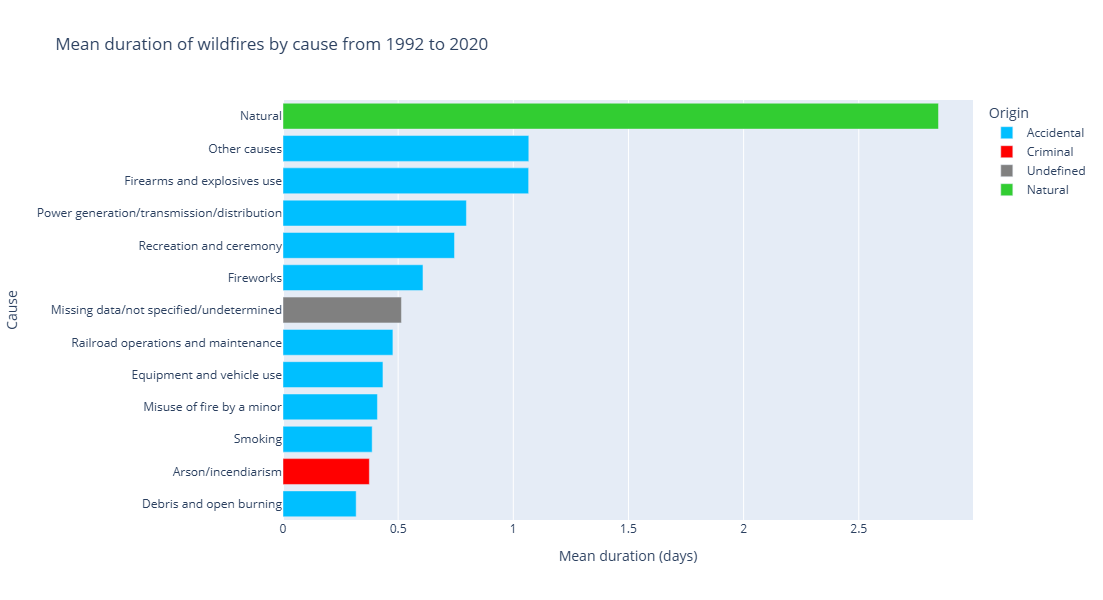

In [ ]:
df['duration'] = df['cont_date'] - df['disc_date']
mean_duration_by_cause = df.groupby(['cause', 'origin'])['duration'].mean().reset_index('origin').sort_values(by = 'duration')

fig_mean_duration =px.bar(mean_duration_by_cause,
                       x = mean_duration_by_cause.duration.dt.total_seconds().div(86400),
                       color = mean_duration_by_cause.origin,
                       color_discrete_sequence = ["deepskyblue", "red", "grey", "limegreen"],
                       width = 1100,
                       height = 600,
                       title = 'Mean duration of wildfires by cause from 1992 to 2020',
                       labels = {'x' : 'Mean duration (days)',
                                'cause' : 'Cause',
                                'origin' : 'Origin'},
                       category_orders={'cause': mean_duration_by_cause.index[::-1]}
                      )

fig_mean_duration.show()